Dataset Overview:


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,TV Shows,Basic,PayPal,0,7,8,0
1,2,69,15,159.714415,1,Sports,Basic,Credit Card,0,7,21,0
2,3,46,25,41.119547,36,Movies,Premium,PayPal,0,5,13,1
3,4,32,28,183.961735,35,Movies,Standard,Credit Card,0,0,27,0
4,5,60,10,87.782848,66,Movies,Standard,Bank Transfer,0,7,18,0



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Subscription_Length_Months  1000 non-null   int64  
 3   Watch_Time_Hours            1000 non-null   float64
 4   Number_of_Logins            1000 non-null   int64  
 5   Preferred_Content_Type      1000 non-null   object 
 6   Membership_Type             1000 non-null   object 
 7   Payment_Method              1000 non-null   object 
 8   Payment_Issues              1000 non-null   int64  
 9   Number_of_Complaints        1000 non-null   int64  
 10  Resolution_Time_Days        1000 non-null   int64  
 11  Churn                       1000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 93.9+ KB


None


Summary Statistics:


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,18.218000,100.794546,50.387000,0.154000,4.546000,15.268000,0.265000
std,288.819436,14.99103,10.177822,56.477606,28.224171,0.361129,2.919316,8.225317,0.441554
min,1.000000,18.00000,1.000000,5.036738,1.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,31.00000,9.000000,50.383080,26.000000,0.000000,2.000000,9.000000,0.000000
50%,500.500000,44.00000,18.000000,100.234954,51.000000,0.000000,5.000000,15.000000,0.000000
75%,750.250000,56.00000,27.000000,150.445885,75.000000,0.000000,7.000000,22.000000,1.000000
max,1000.000000,69.00000,35.000000,199.944192,99.000000,1.000000,9.000000,29.000000,1.000000



Missing Values:


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64

<Figure size 1200x1000 with 0 Axes>

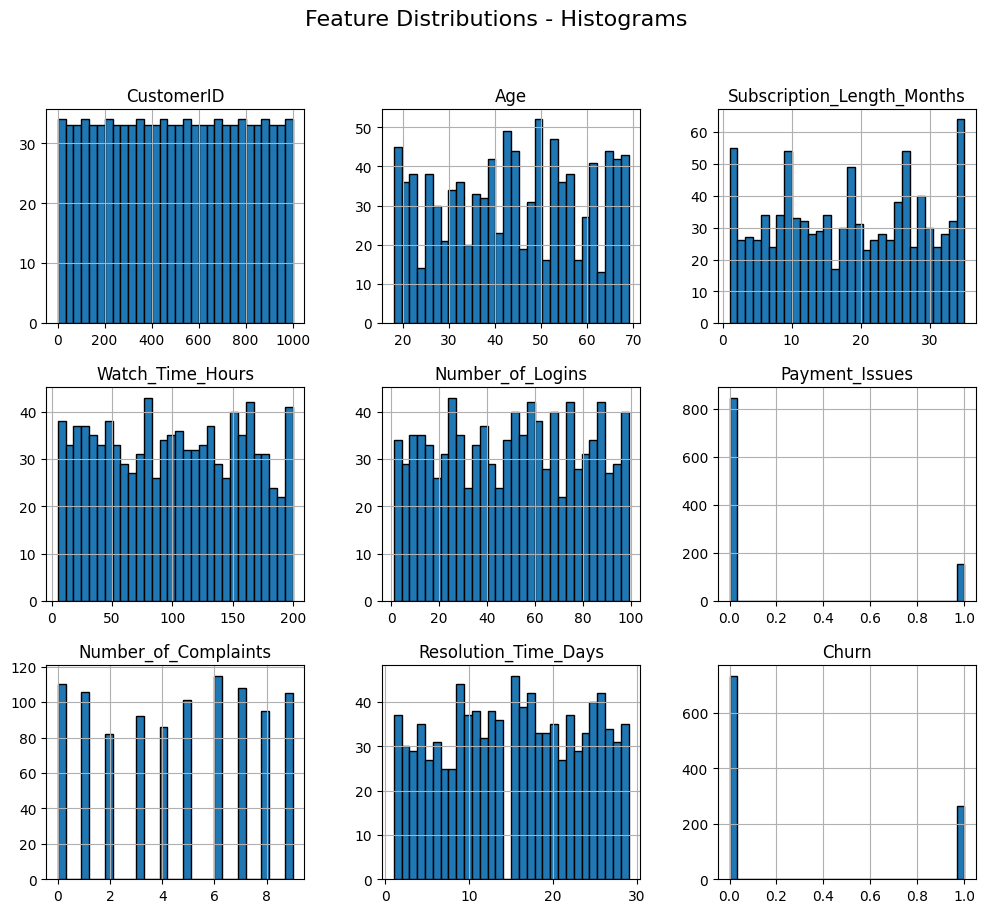

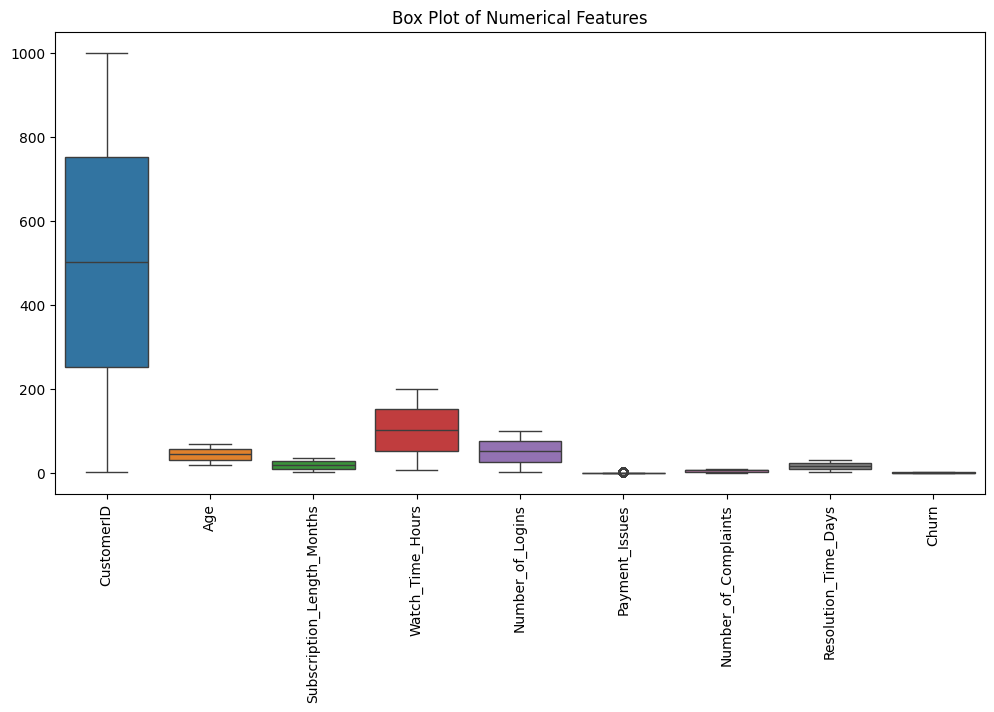

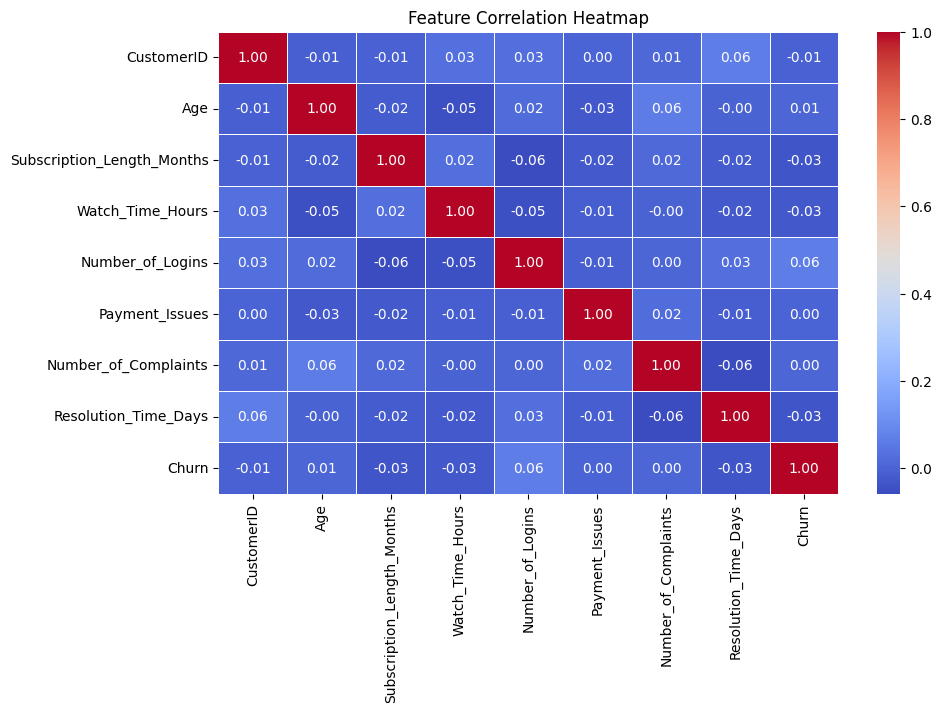


Exploratory Data Analysis Completed.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_churn.csv")

# Display basic information about the dataset
print("Dataset Overview:")
display(df.head())
print("\nDataset Summary:")
display(df.info())

# Summary statistics (only numerical columns)
print("\nSummary Statistics:")
display(df.describe())

# Checking for missing values using a table
print("\nMissing Values:")
display(df.isnull().sum())

# Handling missing values (if any) - Only for numerical columns
df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)

# Visualizing distributions using histograms
plt.figure(figsize=(12, 10))
df.select_dtypes(include=np.number).hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=16)
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

print("\nExploratory Data Analysis Completed.")


In [30]:
# Prepping the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target variable
X = df_encoded.drop(columns=["Churn"])  # Independent Variables
y = df_encoded["Churn"]  # Target Variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}, Test Set Size: {X_test.shape}")


Training Set Size: (800, 11), Test Set Size: (200, 11)


In [ ]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # None means no limit
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']    # Splitting criterion
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_classifier, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model for predictions
best_dt_classifier = grid_search.best_estimator_
y_pred_dt = best_dt_classifier.predict(X_test)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.72625


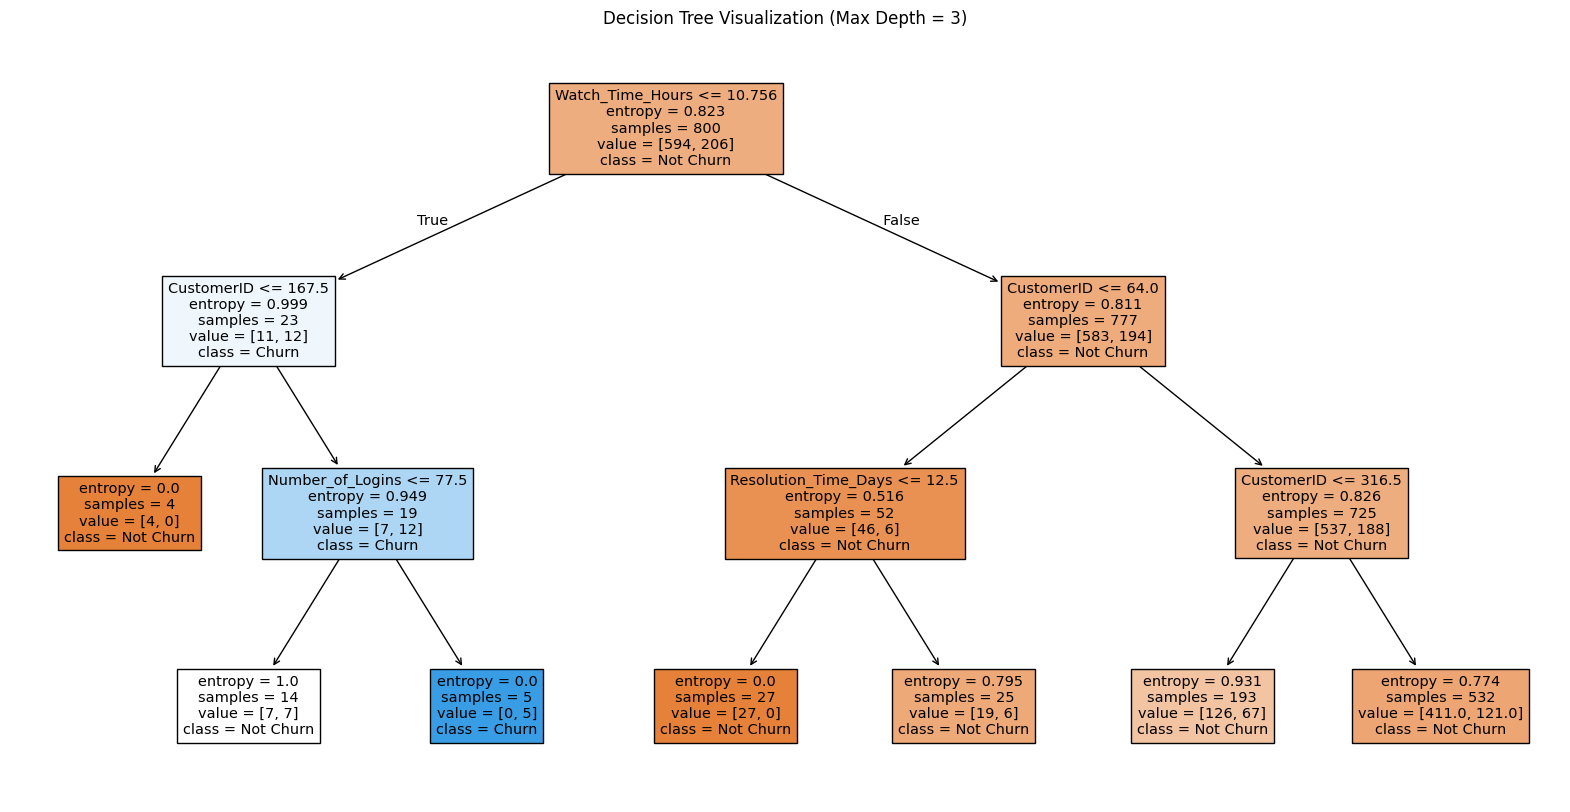

In [ ]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_classifier, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['Not Churn', 'Churn'], 
    max_depth=3  # Limit depth for better visualization
)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

Decision Tree Performance:
Accuracy: 0.71
Precision: 1.0
Recall: 0.01694915254237288
F1 Score: 0.03333333333333333


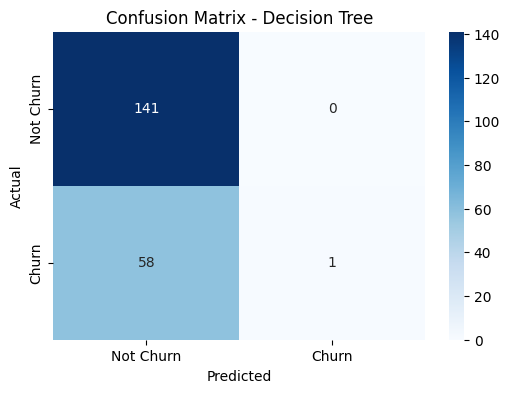


Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.71      1.00      0.83       141
       Churn       1.00      0.02      0.03        59

    accuracy                           0.71       200
   macro avg       0.85      0.51      0.43       200
weighted avg       0.79      0.71      0.59       200



In [ ]:
# Evaluate Decision Tree Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Churn', 'Churn']))

In [ ]:
# training a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

Random Forest Performance:
Accuracy: 0.695
Precision: 0.3333333333333333
Recall: 0.03389830508474576
F1 Score: 0.06153846153846154


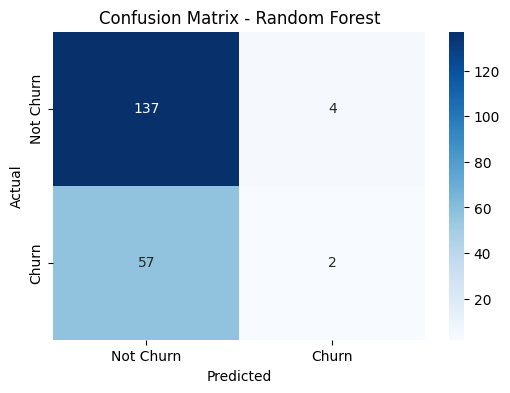


Classification Report (Random Forest):
              precision    recall  f1-score   support

   Not Churn       0.71      0.97      0.82       141
       Churn       0.33      0.03      0.06        59

    accuracy                           0.69       200
   macro avg       0.52      0.50      0.44       200
weighted avg       0.60      0.69      0.59       200



In [ ]:
# Evaluate the Random Forest model performance 
# # Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Not Churn', 'Churn']))

In [51]:
# Hyperparameter Tuning with GridSearchCV
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]  # Add class_weight options
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='f1',  # Optimize for F1 score
    n_jobs=-1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Cross-Validation F1 Score (Random Forest):", grid_search_rf.best_score_)

# Use the best model for predictions
best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf2 = best_rf_classifier.predict(X_test)

Best Parameters (Random Forest): {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation F1 Score (Random Forest): 0.3183483590970053


Random Forest Performance after hyperparamter tuning:
Accuracy: 0.575
Precision: 0.30303030303030304
Recall: 0.3389830508474576
F1 Score: 0.32


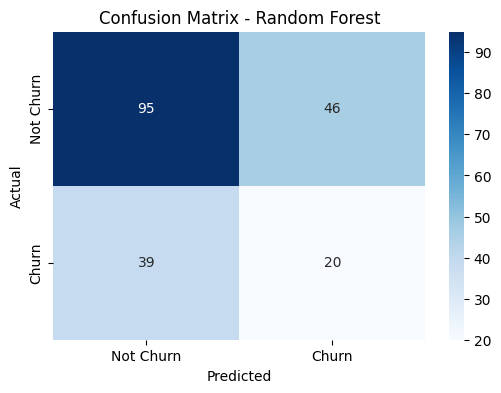


Classification Report (Random Forest):
              precision    recall  f1-score   support

   Not Churn       0.71      0.67      0.69       141
       Churn       0.30      0.34      0.32        59

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.59      0.57      0.58       200



In [52]:
# Evaluate the Random Forest model performance after hyperparameter tuning

# Calculate evaluation metrics
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
precision_rf2 = precision_score(y_test, y_pred_rf2)
recall_rf2 = recall_score(y_test, y_pred_rf2)
f1_rf2 = f1_score(y_test, y_pred_rf2)

print("Random Forest Performance after hyperparamter tuning:")
print("Accuracy:", accuracy_rf2)
print("Precision:", precision_rf2)
print("Recall:", recall_rf2)
print("F1 Score:", f1_rf2)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf2, target_names=['Not Churn', 'Churn']))

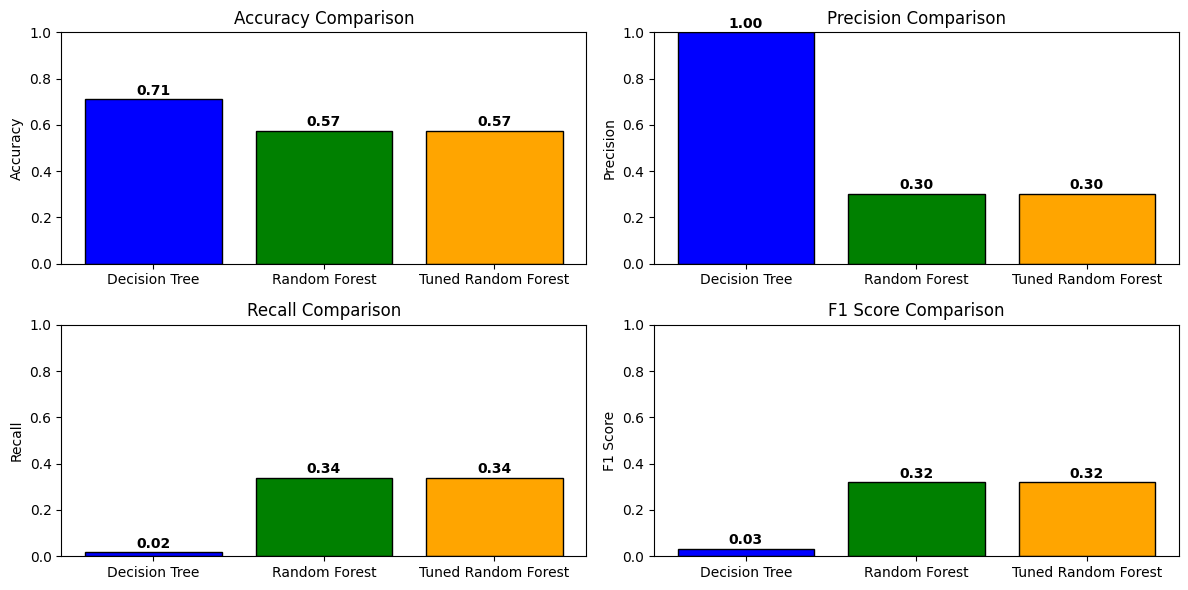

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and performance metrics
models = ["Decision Tree", "Random Forest", "Tuned Random Forest"]
accuracy_scores = [accuracy, accuracy_rf, accuracy_rf2]
precision_scores = [precision, precision_rf, precision_rf2]
recall_scores = [recall, recall_rf, recall_rf2]
f1_scores = [f1, f1_rf, f1_rf2]

# Create a bar plot for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(models, scores[i], color=["blue", "green", "orange"], edgecolor="black")
    plt.title(f"{metric} Comparison")
    plt.ylim(0, 1)
    plt.ylabel(metric)
    for j, score in enumerate(scores[i]):
        plt.text(j, score + 0.02, f"{score:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


Key Observations from the Visualization 📊
Decision Tree has the highest accuracy, but it's overfitting and fails on recall.
Random Forest before tuning performs slightly worse than Decision Tree in accuracy but improves recall.
Tuned Random Forest significantly improves recall (0.34), making it better at identifying churned customers.
F1-score increases after hyperparameter tuning, balancing precision and recall.

Why Did Random Forest Perform Better?

Random Forest Reduces Overfitting: The Decision Tree overfits due to its structure, leading to high precision but terrible recall. Random Forest averages multiple trees, reducing bias and improving generalization.
Better Handling of Imbalanced Data: Decision Trees tend to favor the majority class (Not Churn), leading to poor recall.Tuned Random Forest adjusts for class imbalance (class_weight='balanced'), improving recall.
Handles Noisy Data More Effectively: Decision Trees make splits based on local patterns and can overfit on noise.Random Forest uses multiple trees, making it more robust.


C:\Users\Yashesh\AppData\Local\Temp\ipykernel_16760\1561674738.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


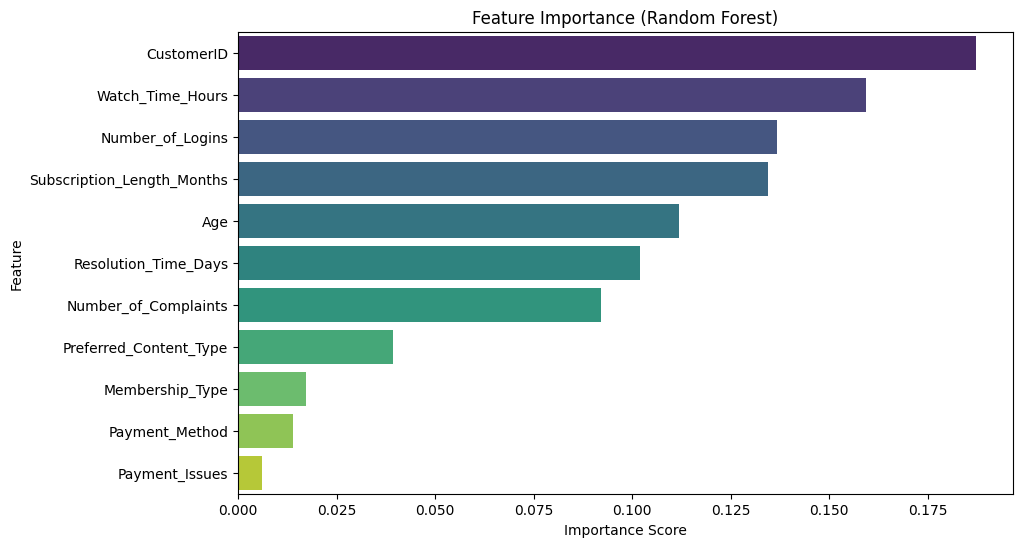

In [54]:
# feature importance analysis

import pandas as pd
import seaborn as sns

# Extract feature importances from Random Forest
feature_importance = best_rf_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
Key Insights from Feature Importance:
Watch Time and number of logins are the top contributors to churn.
Subscription length & Age also play a significant role.
Complaints and their resolution time also affects churn behavior.